In [1]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

In [2]:
import torch
from torch.autograd import Variable
import torch.utils.data as Data

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/ComputoCienciasUniandes/IntroDeepLearning_202102/main/datos/MLP_regresion.csv')
x = data['X']
y = data['Y']

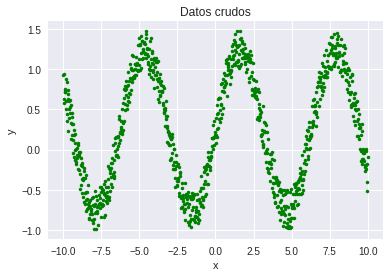

In [5]:
plt.title('Datos crudos')
plt.plot(x,y,'.g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
# Tensores
X = Variable(torch.from_numpy(x.to_numpy())).float()
X = torch.unsqueeze(X,dim=1)


Y = Variable(torch.from_numpy(y.to_numpy())).float()
Y = torch.unsqueeze(Y,dim=1)

## Modelo incial

Epoch: [1/1], loss: 3.1247737407684326


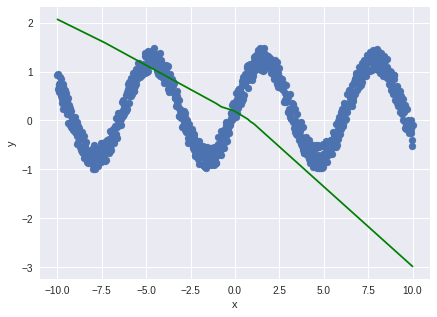

Epoch: [1/5000], loss: nan


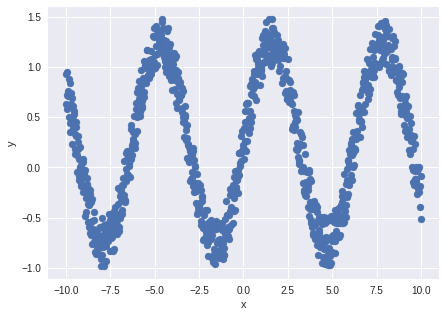

In [33]:
losesi=[]
input_dim = 1
model_i =torch.nn.Sequential(
    torch.nn.Linear(input_dim,15),
    torch.nn.ReLU(),
    torch.nn.Linear(15,input_dim),
)
optimizer_i = torch.optim.SGD(model_i.parameters(), lr=0.05)
criterion_i = torch.nn.MSELoss()
n_epoch = 5000
loss_l1 = []

for epoch in range(n_epoch):
  
  Y_pred_1 = model_i(X)

  loss = criterion_1(Y_pred_1,Y)
  loss_l1.append(loss.item())

  optimizer_i.zero_grad()
  loss.backward()
  optimizer_i.step()

  loses1.append(loss.item())
  q=n_epoch/3

  if epoch%q==0 or epoch==n_epoch-1:
    print('Epoch: [1/{}], loss: {}'.format(epoch+1,loss.item()))
    fig = plt.figure(figsize=(7,5))
    plt.scatter(X.data.numpy(), Y.data.numpy())
    plt.plot(X.data.numpy(), Y_pred_1.data.numpy(), 'g-')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show() 

## Modelo 1

Epoch: [1/1], loss: 0.7065103650093079


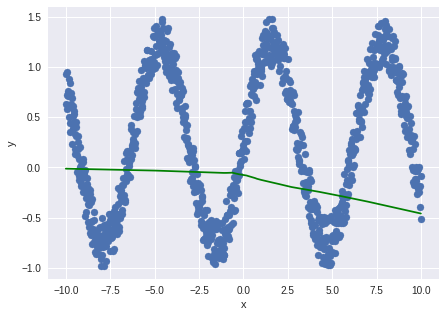

Epoch: [1/5000], loss: 0.0442311130464077


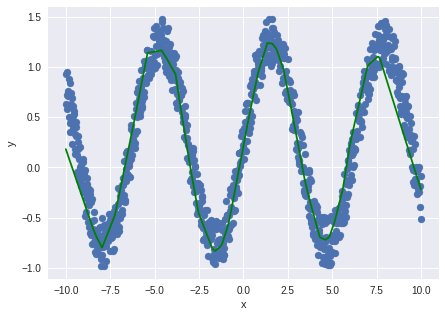

In [35]:
# Crecion del modelo 1

loses1=[]
input_dim = 1
model_1 =torch.nn.Sequential(
    torch.nn.Linear(input_dim,15),
    torch.nn.ReLU(),
    torch.nn.Linear(15,20),
    torch.nn.ReLU(),
    torch.nn.Linear(20,15),
    torch.nn.ReLU(),
    torch.nn.Linear(15,input_dim)
)
optimizer_1 = torch.optim.SGD(model_1.parameters(), lr=0.05)
criterion_1 = torch.nn.MSELoss()
n_epoch = 5000
loss_l1 = []

for epoch in range(n_epoch):
  
  Y_pred_1 = model_1(X)

  loss = criterion_1(Y_pred_1,Y)
  loss_l1.append(loss.item())

  optimizer_1.zero_grad()
  loss.backward()
  optimizer_1.step()

  loses1.append(loss.item())
  q=n_epoch/3

  if epoch%q==0 or epoch==n_epoch-1:
    print('Epoch: [1/{}], loss: {}'.format(epoch+1,loss.item()))
    fig = plt.figure(figsize=(7,5))
    plt.scatter(X.data.numpy(), Y.data.numpy())
    plt.plot(X.data.numpy(), Y_pred_1.data.numpy(), 'g-')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()  

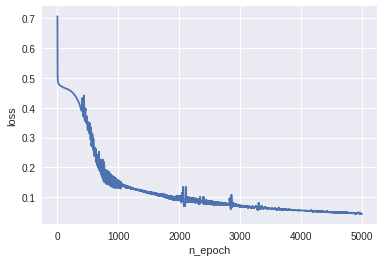

In [36]:
plt.plot(loses1)
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.show()

## Modelo 2

In [58]:
def model2(neurons,n_plots,n_epoch1):
  neus=[]
  loses=[]
  for neu in neurons:

    input_dim = 1
    model_1 =torch.nn.Sequential(
        torch.nn.Linear(input_dim,neu),
        torch.nn.Sigmoid(),
        torch.nn.Linear(neu,input_dim),
        #torch.nn.Softmax(dim=1)
    )
    optimizer_1 = torch.optim.SGD(model_1.parameters(), lr=0.05)
    criterion_1 = torch.nn.MSELoss()
    n_epoch = n_epoch1
    loss_l1 = []

    for epoch in range(n_epoch):
      
      Y_pred_1 = model_1(X)

      loss = criterion_1(Y_pred_1,Y)
      loss_l1.append(loss.item())

      optimizer_1.zero_grad()
      loss.backward()
      optimizer_1.step()

      loses.append(loss.item())
      q=n_epoch/n_plots

      if epoch%q==0 or epoch==n_epoch-1:
        print('Epoch: [1/{}], loss: {}'.format(epoch+1,loss.item()))
        fig = plt.figure(figsize=(7,5))
        plt.scatter(X.data.numpy(), Y.data.numpy())
        plt.plot(X.data.numpy(), Y_pred_1.data.numpy(), 'g-')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
  return loses
      

Epoch: [1/1], loss: 1.057343602180481


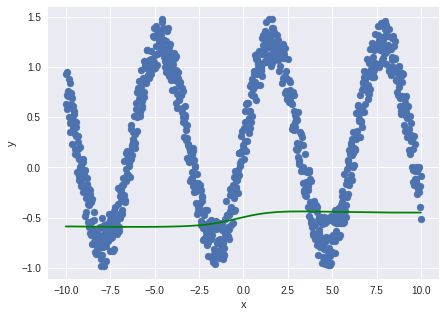

Epoch: [1/10001], loss: 0.1706804484128952


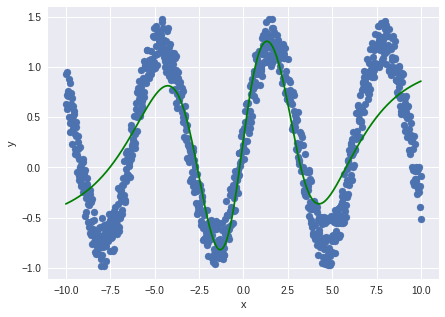

Epoch: [1/20001], loss: 0.1231900230050087


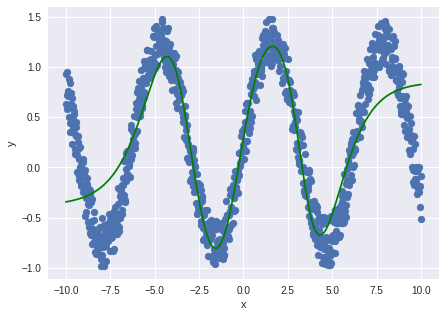

Epoch: [1/30001], loss: 0.10912100225687027


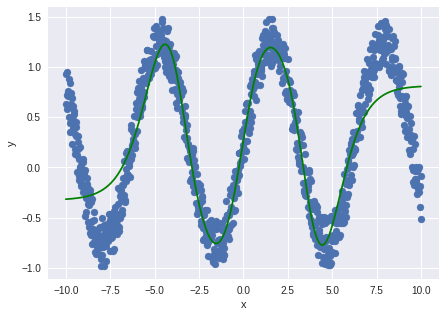

Epoch: [1/40001], loss: 0.09588595479726791


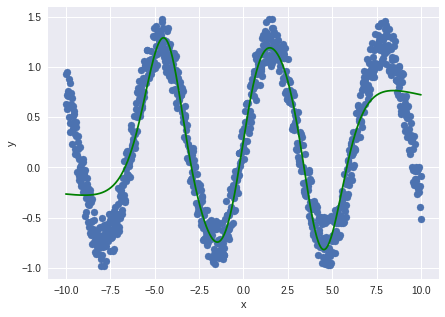

Epoch: [1/50000], loss: 0.08021386712789536


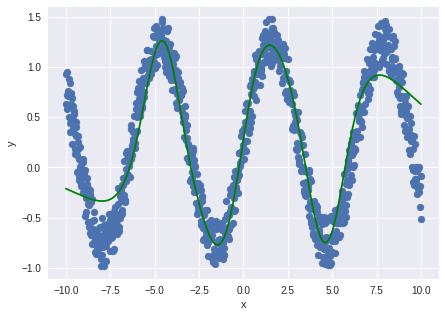

In [60]:
l1 = model2(neurons=[15],n_plots=5,n_epoch1=50000)

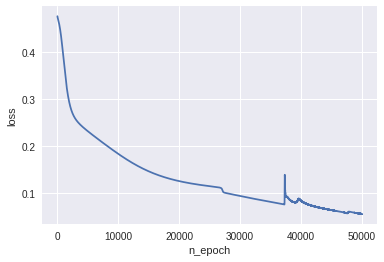

In [57]:
plt.plot(l1)
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.show()

## Descripción
Todas los modelos se corrienron con 5000 épocas

### Modelo incial
Para el modelo incial se empleo el modelo base para tener una de idea de como abordar el problema, este cuenta con dos capas con una conexión lineal de 15 neura, para estre problema la perdida diverge por lo que este no es un modelo viable. 

### Modelo 1
Para el modelo 1 se procedio a añadir más capas, para este cuenta con 3 capas, con neuronas de la forma 15,20,15 conectadas de forma lineal. En este modelo ya se percibe como el aumento de capas ayuda a una más rapida y correcta convergencia. Para este caso se observa como logra superar la barrera de 0.1  antes en la época 200.

### Modelo 2
Para el modeo 2 se decidio realizar cambio en la función de activación, donde revisando la docuemntación de pyTorch se encontró la función SIgmoid, la cual tiene un activación más suave con la mismas capas y número neuras que la anterior, hace que el número de epocas aumente y para este caso al aumentar capas del mismo estilo, el modelo no aparenta mejoria,aun teneindo la misma cantidad de neuronas en cada etapa.



<img src="https://pytorch.org/docs/stable/_images/ReLU.png" alt="drawing" width="500"/>
<img src="https://pytorch.org/docs/stable/_images/Sigmoid.png" alt="drawing" width="500"/>

Como se puede observa la función de activación *Relu*, es más cortante miestras que *Sigmoid*, lo que va más de acuerdo a la función que se quiere modelar 



* Disclaimer: Este docuemnto esta basado y presenta estructura similar a la guia trabajada en clase. Del documento que se puede encontrar en el repositorio: https://github.com/ComputoCienciasUniandes/IntroDeepLearning_202102/blob/main/notebooks/08_RN_Problema_Regresion.ipynb